## Лабораторная работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import DistanceMetric
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist

# Импортирование датасета и обработка его данных

In [2]:
df = pd.read_csv('4heart2.csv', delimiter = ',')

In [3]:
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Вывод первых 20 строк датафрейма. Датасет содержит информацию о записях болезней сердца. 
Столбцы
1. возраст: возраст пациента (лет)
2. -анемия: снижение количества эритроцитов или
гемоглобина (логическое значение)
3. -высокое кровяное давление: если у пациента
гипертония (логическое значение)
4. креатининфосфокиназа (КФК): уровень
фермента КФК в крови (мкг/л)
5. диабет: если у пациента диабет (логическое
значение)
6. фракция выброса: процент крови, покидающей
сердце при каждом сокращении (в процентах)
7. тромбоциты: тромбоциты в крови
(килотромбоциты/ мл)
8. пол: женщина или мужчина (бинарный)
9. креатинин сыворотки: уровень креатинина
сыворотки в крови (мг/дл)
10. натрий сыворотки: уровень натрия сыворотки в
крови (мэкв/л)
11.курение: если пациент курит или нет
(логическое)
12.время: период наблюдения (дни)
13. событие смерти: если пациент умер в течение
периода наблюдения (логическое значение)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Оценка данных. Датасет имеет триннадцать столбцов, 299 значений, 3 столбца имеет тип float, другие int.

In [5]:
df[['age']] = df[['age']].astype(np.int64)

Преобразивание типа данных для столбца 'age' из float в int

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Вывод названий столбцов

In [8]:
df.columns = df.columns.str.lower()

Перевод названий столбцов к нижнему регистру

In [9]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'death_event'],
      dtype='object')

In [10]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Проверка на пропуски (пропусков не обнаружено)

In [11]:
df.duplicated().sum()

0

Проверка на явные дубликаты (явных дубликатов не обнаружено)

In [12]:
df['age'].unique()

array([75, 55, 65, 50, 90, 60, 80, 62, 45, 49, 82, 87, 70, 48, 68, 53, 95,
       58, 94, 85, 69, 72, 51, 57, 42, 41, 67, 79, 59, 44, 63, 86, 66, 43,
       46, 61, 81, 52, 64, 40, 73, 77, 78, 54, 47, 56], dtype=int64)

Проверка на неявные дубликаты

In [13]:
df.loc[df['age']==60.667,'age'] = 70

Замена значения в стобце 'age'

In [14]:
df['age'].unique()

array([75, 55, 65, 50, 90, 60, 80, 62, 45, 49, 82, 87, 70, 48, 68, 53, 95,
       58, 94, 85, 69, 72, 51, 57, 42, 41, 67, 79, 59, 44, 63, 86, 66, 43,
       46, 61, 81, 52, 64, 40, 73, 77, 78, 54, 47, 56], dtype=int64)

### Описание значений в столбцах

In [15]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Некоторые выводы по данным из таблицы:
Средний возраст пациента 61 год
Самому молодому пациенту 40 лет
Самому старому 95
Среднее значение анемии 0.431438
Количество пациентов с диабетом 1

### Кластеризация данных агломеративным иерархическим методом
Суть иерархической кластеризации проста. Когда  задана функция
расстояния, можно вычислить матрицу расстояний между всеми объектами, в
ячейках которой будет попарное расстояние между двумя объектами. А ещё
учтены все признаки объектов, а не только два.  
Целевым признаком является столбец 'death_event'

[[234.         239.           0.62381702   2.        ]
 [146.         157.           0.72138854   2.        ]
 [274.         293.           0.72208681   2.        ]
 ...
 [590.         592.          19.32064948 162.        ]
 [568.         594.          19.72772063 168.        ]
 [593.         595.          24.63177014 299.        ]]


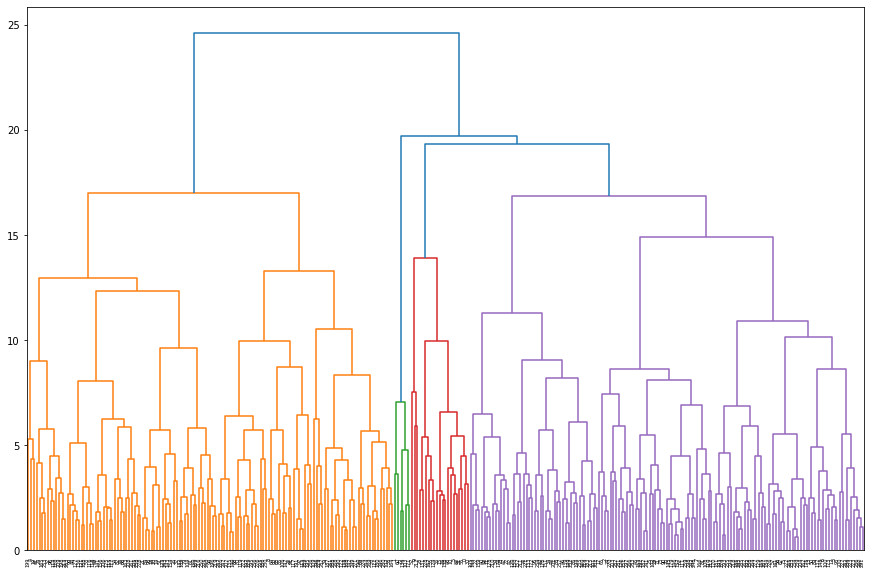

In [16]:
dfForScaler = df.copy()
dfForScaler = dfForScaler.drop(['death_event'], axis=1)
sc = StandardScaler()
X_sc = sc.fit_transform(dfForScaler)
linked = linkage(X_sc, method = 'ward')
print(linked)
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.show()

### Заключение
На основании построенного графика можно сделать вывод, что оптимальное число кластеров 4.

### Метод k-mens

K-Means группирует объекты пошагово. Алгоритм основан на
предположении, что число кластеров (групп) заранее известно. Это довольно
сильное допущение, и часто выбор оптимального количества кластеров
заслуживает решения отдельных задач.

### Вычисление метрики силуэта

Метрика силуэта показывает, насколько объект своего кластера похож
на свой кластер больше, чем на чужой.

In [17]:
km = KMeans(4)
km.fit(dfForScaler, dfForScaler.columns.to_list()[0])
np.unique(km.labels_)
print(silhouette_score(X_sc, km.labels_))

0.02148552033360416


### Заключение
Так как значение метрики силуэта очень мало, то можно сделать вывод о том, что наши кластеры будут частично наложены друг на друга

### Вычисление метрик расстояний

Мтеркиа расстояний показывет расстояние между двумя точками Евклидова пространства, вычисляемое по теореме Пифагора

In [18]:
dist = DistanceMetric.get_metric('euclidean')
dist.pairwise(dfForScaler)

D:\anaconda\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


array([[     0.        ,   7461.94827916, 103000.92333741, ...,
        477002.37119768, 125013.7195001 , 130000.88170889],
       [  7461.94827916,      0.        , 101651.22697499, ...,
        478677.19981275, 123478.57896239, 131865.22819429],
       [103000.92333741, 101651.22697499,      0.        , ...,
        580003.22319902,  22118.19755337, 233000.17313961],
       ...,
       [477002.37119768, 478677.19981275, 580003.22319902, ...,
             0.        , 602000.10390727, 347005.00688411],
       [125013.7195001 , 123478.57896239,  22118.19755337, ...,
        602000.10390727,      0.        , 255009.63747286],
       [130000.88170889, 131865.22819429, 233000.17313961, ...,
        347005.00688411, 255009.63747286,      0.        ]])

### Расчет метрики силуэта для кластеров от 2 до 10

In [19]:
for i in range(2, 10):
    km = KMeans(i)
    km.fit(dfForScaler, dfForScaler.columns.to_list()[0])
    np.unique(km.labels_)
    print(silhouette_score(X_sc, km.labels_))

0.08285210059251848
0.028307931170490318
0.02148552033360416
0.0037288261837896846
-0.0030489502439368463
-0.008669779993679
-0.010970132623740561
-0.015899888161923455


### Заключение
Исходя из значений можно сделать вывод, что оптимальное число кластеров равно двум

### График важности характеристик

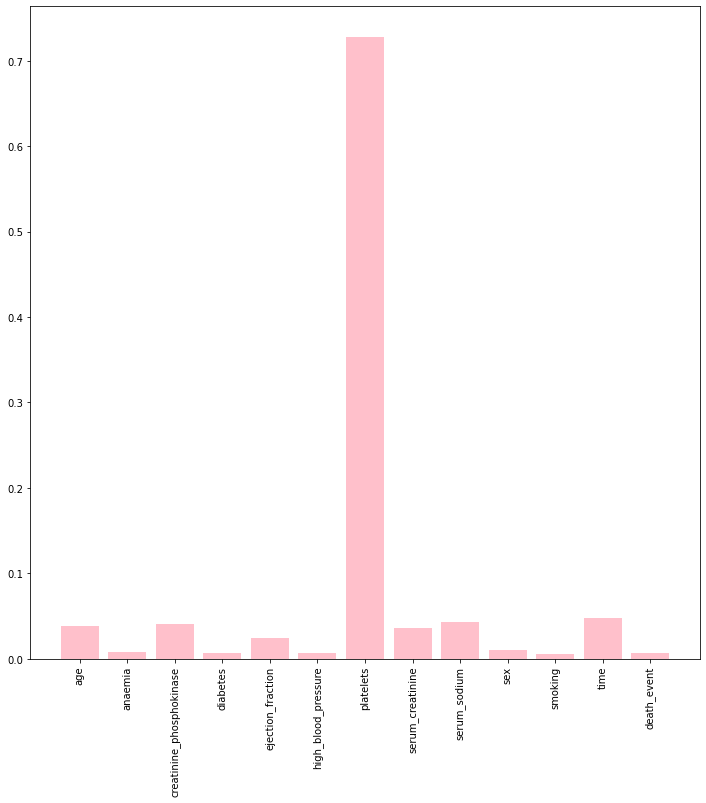

In [20]:
km2 = KMeans(2)
km2.fit(df)

clf = RandomForestClassifier()
clf.fit(df, km2.labels_)

plt.figure(figsize=(12,12))
plt.bar(df.columns, clf.feature_importances_,color='pink')
plt.xticks(rotation=90)

plt.show()

### Заключение
Исходя из графика можно сделать вывод, что наиболее важными характеристиками являются: platelets, time и serum_sodium.

### Расчет Евклидова расстояния между кластерами

In [21]:
euclidean_distances(dfForScaler)

array([[     0.        ,   7461.94827916, 103000.92333741, ...,
        477002.37119768, 125013.7195001 , 130000.88170889],
       [  7461.94827916,      0.        , 101651.22697499, ...,
        478677.19981275, 123478.57896239, 131865.22819429],
       [103000.92333741, 101651.22697499,      0.        , ...,
        580003.22319902,  22118.19755337, 233000.17313961],
       ...,
       [477002.37119768, 478677.19981275, 580003.22319902, ...,
             0.        , 602000.10390727, 347005.00688411],
       [125013.7195001 , 123478.57896239,  22118.19755337, ...,
        602000.10390727,      0.        , 255009.63747286],
       [130000.88170889, 131865.22819429, 233000.17313961, ...,
        347005.00688411, 255009.63747286,      0.        ]])

### Определение объектов, относящихся к каждому кластеру

In [22]:
sc = StandardScaler()
X_sc = sc.fit_transform(dfForScaler)
km = KMeans(n_clusters=2, random_state=0)
labels = km.fit_predict(X_sc)
print(labels)

[0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1
 1 0 0]


### Создание сводной таблицы

Была создана сводная таблица для двух кластеров.
На основе данной таблицы можно сделать несколько выводов:
-Возраст пациентов примерно одинаковый
-уровень снижения количества эритроцитов или гемоглобина также примерно одинаков
-уровень КФК у первого кластера достаточно выше чем у второго
-кол-во пациентов с диабетом у первого кластера меньшем чем у второго
-кол-во тромбоцитов у второго кластера выше чем у первого
-натрий сыворотки у обоих кластеров одинаков
-количество курящих у пациентов певого кластера намного выше чем у второго

In [28]:
df['Clusters'] = labels
data_pivot = pd.pivot_table(
    df,
    index='Clusters',
    values=df, 
    aggfunc=np.mean)
data_pivot

,age,anaemia,creatinine_phosphokinase,death_event,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
Clusters,,,,,,,,,,,,,
0,61.468750,0.395833,643.395833,0.322917,0.354167,36.552083,0.307292,253473.065000,1.404375,136.520833,1.000000,0.479167,129.338542
1,59.682243,0.495327,471.383178,0.317757,0.532710,40.831776,0.429907,281095.535234,1.375047,136.813084,0.018692,0.037383,131.915888


### Метод локтя

Метод локтя рассматривает характер изменения разброса  Wtotal  с увеличением числа групп  k . Объединив все  n  наблюдений в одну группу, мы имеем наибольшую внутрикластерную дисперсию, которая будет снижаться до 0 при  k→n . На каком-то этапе можно усмотреть, что снижение этой дисперсии замедляется - на графике это происходит в точке, называемой “локтем” (родственник “каменистой осыпи” для анализа главных компонент)

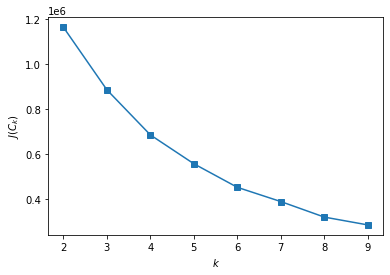

In [32]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(dfForScaler)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(2, 10), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

### Создание точечной диаграммы

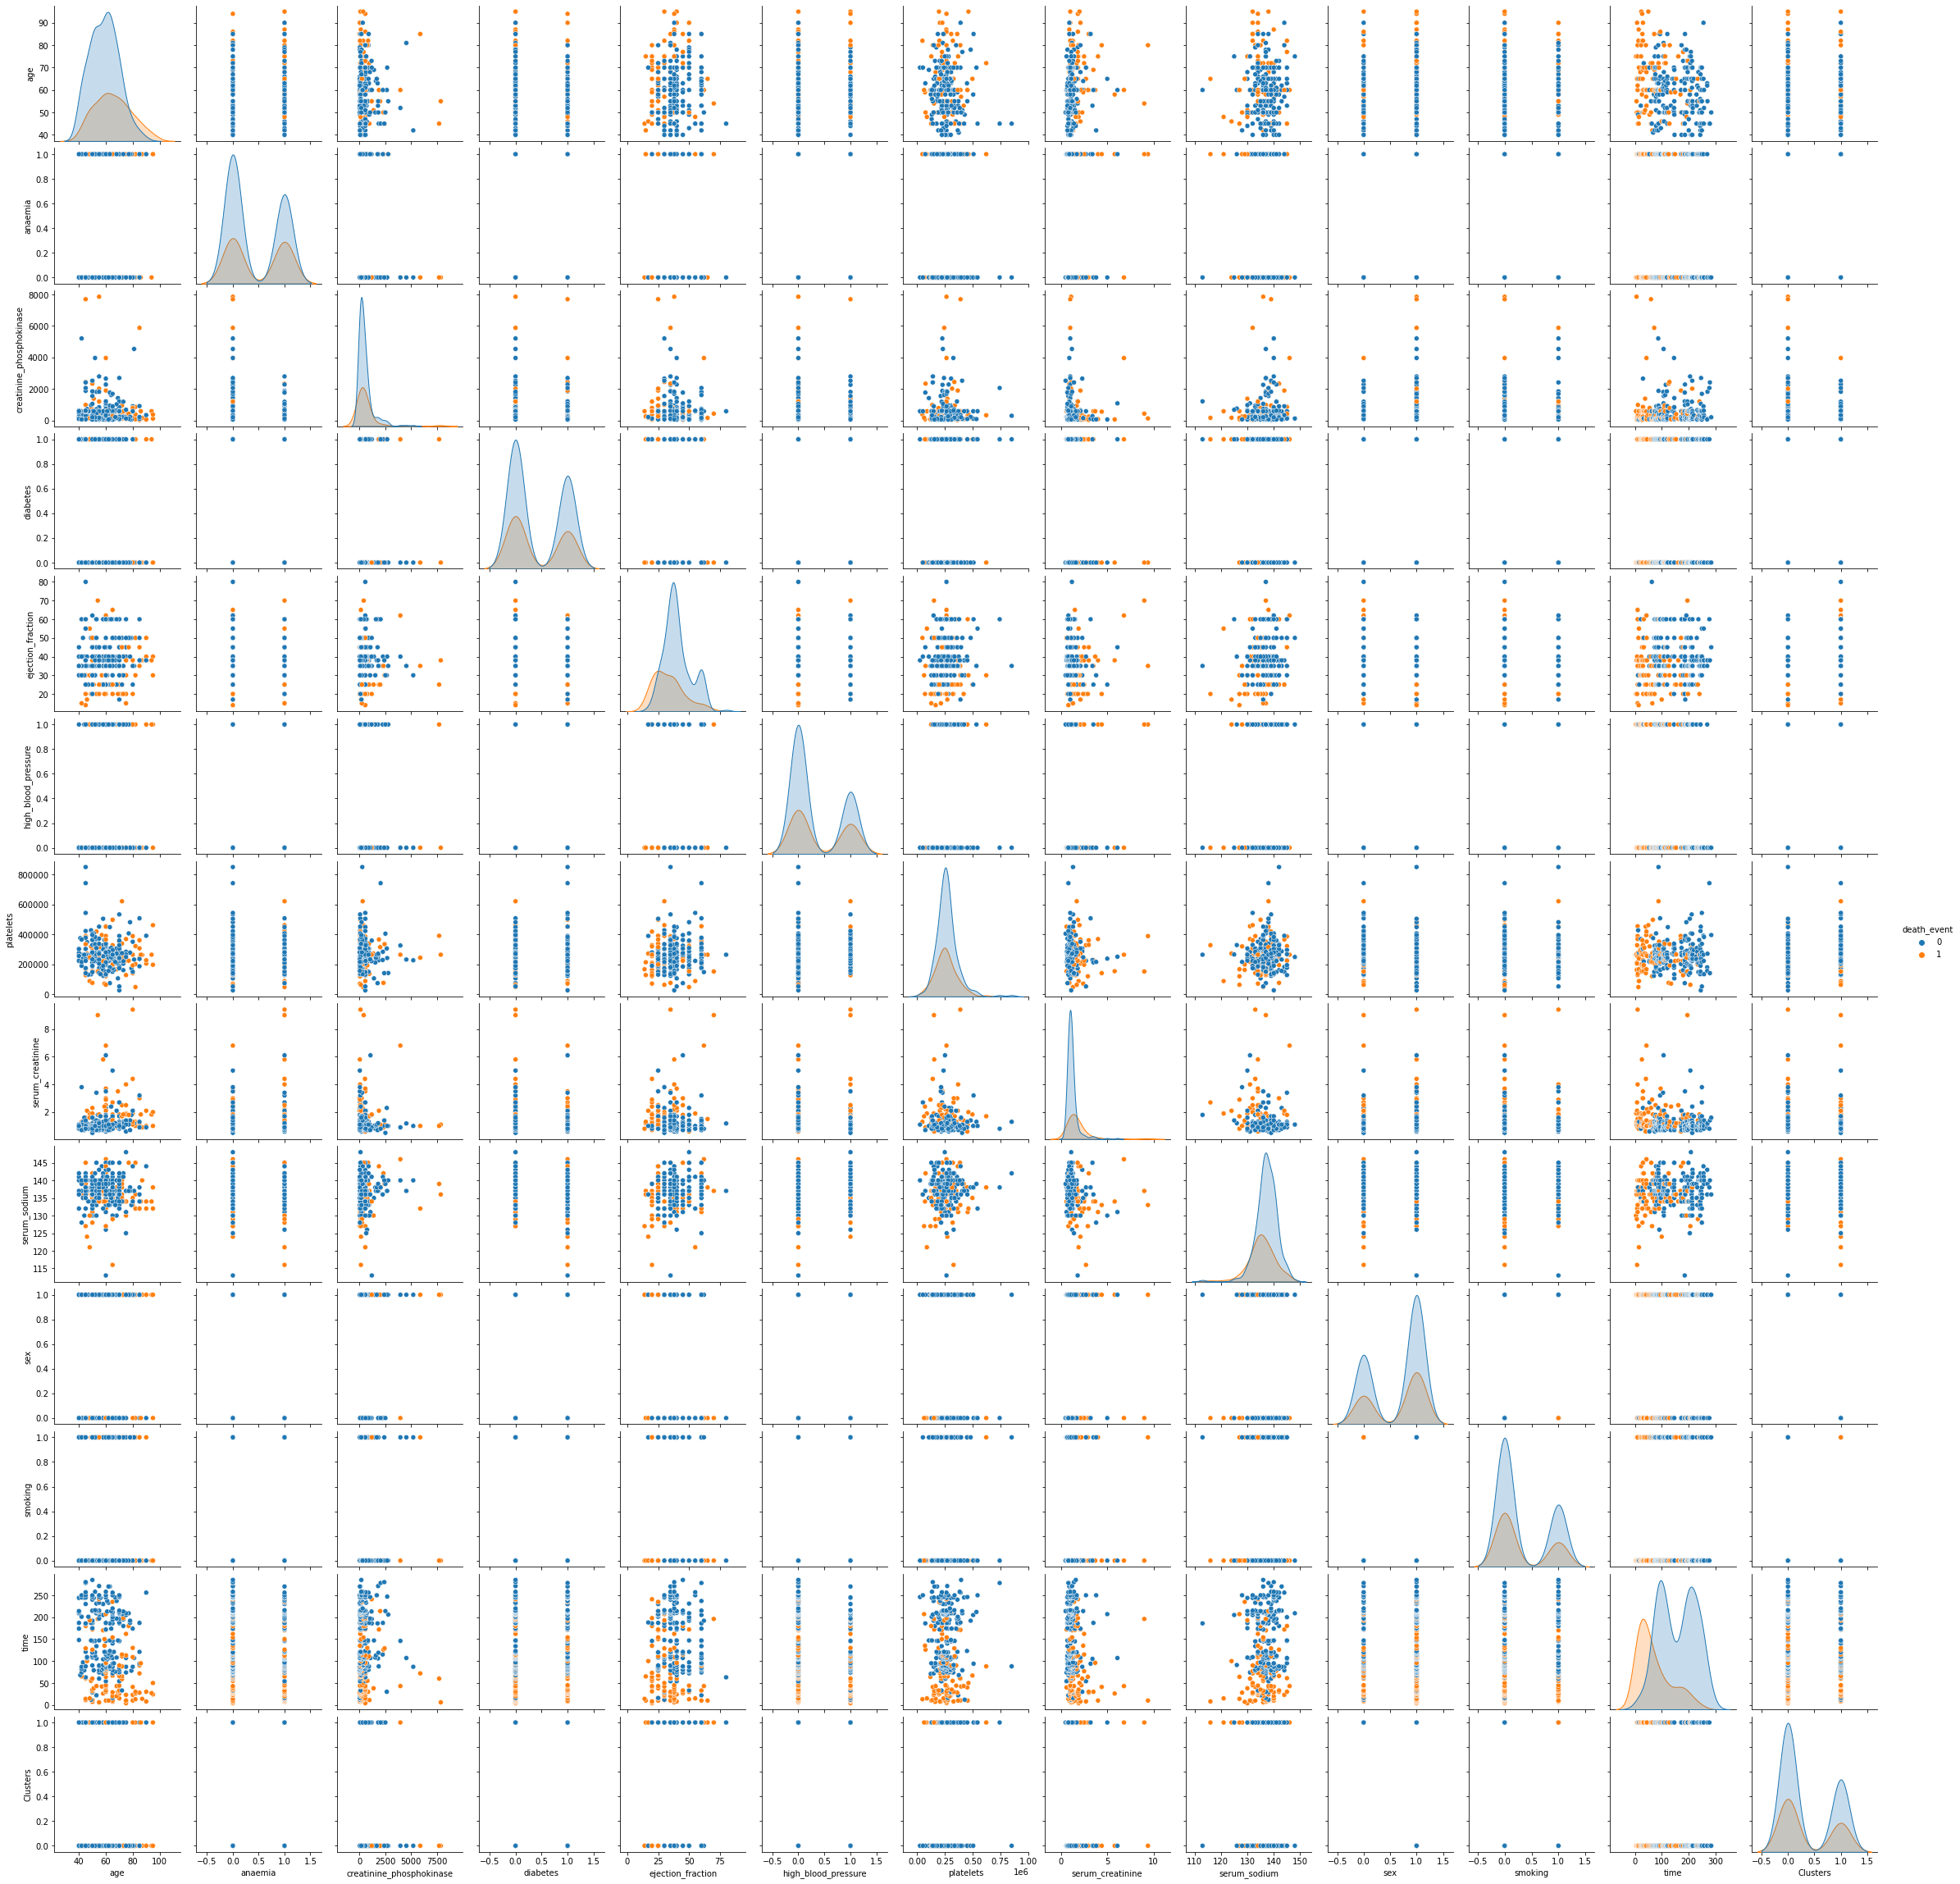

In [33]:
import seaborn as sns
sns.pairplot(data=df, hue='death_event')

### Заключение

-Время наблюдения пациентов всех возрастов примерно одинаковое
-В основном с ростом возраста пациента растут показания его анализов
-С увеличением времени наблюдения увеличивается креатин и натрий сыворотки

### Вывод:
В процессе выполнения лабораторной работы были изучены алгоритмы и методы кластерного анализа на практике.

В ходе лабораторной работы была проведена передобработка данных, также для кластеризации – разделение объектов на группы, были реализованы два метода: иерархический аглораметивный и метод k – средних, они отличаются тем, что первый не требует заданного числа кластеров, в отличие от второго, также метод k – средних группирует объекты пошагово, так как известно число кластеров, а агломеративная иерархическая кластеризация вычисляет расстояние попарно между двумя объектами и объединяет близкие кластеры. 

Далее были рассчитаны метрики расстояний, была построена диаграмма, где выделяются три признака, которые оказали наибольшее значение для выделения кластеров, на этом основании была выдвинута гипотеза о возможном числе кластеров. Было рассчитано оптимальное число кластеров для метода k – средних, рассчитано евклидово расстояние, также определены три наиболее важных признака и определены объекты, относящиеся к каждому кластеру.